# 실습5. 시간 의존 슈뢰딩거 방정식

(1,2번 모두 FDM을 사용하여 $\psi(x, t)$을 구하고, $Re(\psi(x, t)), Im(\psi(x, t)), |\psi(x, t)|^2$ 세 가지를 그리시오.)

1. 초기조건 $\psi(x, t=0) = \sin\left(\dfrac{\pi x}{L}\right)$ 일 때, $\psi(x, t)$를 구해서 시간에 따라 변하는 그래프를 그리시오.

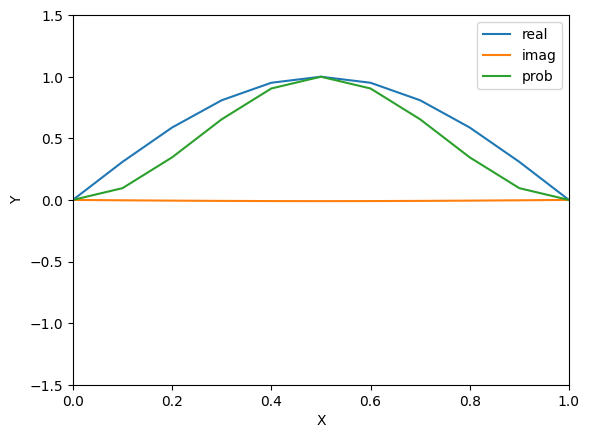

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m= 1; T = 1.5; L = 1;
dx = L/10 ; dt = dx**2*m/hbar/10;
x=np.arange(0, L+dx, dx)
t= np.arange(0, T+dt, dt)

V= np.zeros_like(x)
V[0] = V[-1] = float("inf")

def update(frame):
    global ydata
    ydata[1:-1] = ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
    line_real.set_ydata(ydata.real)
    line_imag.set_ydata(ydata.imag)
    line_prob.set_ydata(abs(ydata)**2)
    return line_real, line_prob, line_imag

# 초기 설정
fig, ax = plt.subplots()
ydata = np.sin(np.pi*x/L) +0j
line_real, = ax.plot(x, ydata.real, label = 'real')
line_imag, = ax.plot(x, ydata.imag, label = 'imag')
line_prob, = ax.plot(x, abs(ydata)**2, label = 'prob')
ax.set_ylim(-1.5, 1.5)  # y축 범위 설정
ax.set_xlim(0, L)  # x축 범위 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 애니메이션 설정
ani = FuncAnimation(fig, update, frames=t, blit=True, interval=20)

plt.legend()
plt.show()
HTML(ani.to_html5_video())

시간 의존 슈뢰딩거 방정식의 경우 다음과 같이 표현할 수 있다.
$$i\hbar \dfrac{d\psi}{dt} = -\dfrac{\hbar^2}{2m}\dfrac{d^2\psi}{dx^2}+V\psi$$ \\
위의 식을 Discretization하여 $\Delta t$와 $\Delta x$에 관한 식으로 나타내면
$$i\hbar \dfrac{\psi_{m,n+1} - \psi_{m,n}}{\Delta t} = - \dfrac{\hbar^2}{2m} \dfrac{\psi_{m+1,n} - 2\psi_{m,n} + \psi_{m-1,n}}{\Delta x^2} + V_{m,n} \psi_{m,n}$$
과 같이 표현 가능하다.

위의 코드에서 식에 사용되는 변수인 $\hbar$, $m$, $L$은 1로 설정하였으며, $T$는 1.5로 설정하였다. $dx$는 $\dfrac{L}{10}$, $dt$는 $\dfrac{mdx^2}{10\hbar}$로 설정하였다. 리스트 x는 $0 \sim L+dx$의 값을 $dx$의 간격으로 나눈 리스트이다. 리스트 t는 $0 \sim T+dt$의 값을 $dt$의 간격으로 나눈 리스트이다. 리스트 V는 슈뢰딩거 방정식의 $V$를 나타낸 것으로, 리스트의 0번째 원소와 마지막 원소는 $\infty$로 지정하였으며, 나머지 원소는 0으로 설정하여 문제에서 주어진 무한 우물 퍼텐셜의 경계조건을 만족하도록 설정하였다. 사용자 정의 함수 update는 시간에 따라 슈뢰딩거 방정식의 $\psi$값을 업데이트 해주는 함수이다. 먼저 $\psi$의 값을 나타내는 변수 ydata를 전역변수로 선언하였으며, 함수 내의
```
ydata[1:-1] = ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
```
는 이산화 된 슈뢰딩거 방정식의 $\psi_{m,1} = \psi_{m,0} + \dfrac{\Delta t}{i\hbar} \left( -\dfrac{\hbar^2}{2m} \dfrac{\psi_{m+1,0} - 2\psi_{m,0} + \psi_{m-1,0}}{\Delta x^2} + V_{m,0}\psi_{m,0} \right)$
식을 의미한다. 위 코드는 frame에 따라 dt와 dx를 통해 ydata의 값을 업데이트 한다.
이후 ydata의 실수부분, 허수부분, 제곱값(확률)을 나타내는 line_real, line_prob, line_imag을 반환하였다. \\
ydata의 초기값은 문제에서 주어진 대로 $\sin\left(\dfrac{\pi x}{L}\right)$로 지정하였으며, line_real, line_prob, line_imag에 대해 각각 그래프를 작성하여 HTML5를 통해 시간에 따라 그래프가 움직이도록 영상으로 표현하였다.


2. 초기조건 $\psi(x, t=0) = \sin\left(\dfrac{\pi x}{L}\right) + \sin\left(\dfrac{2\pi x}{L}\right)$ 일 때, $\psi(x, t)$를 구해서 시간에 따라 변하는 그래프를 그리시오.

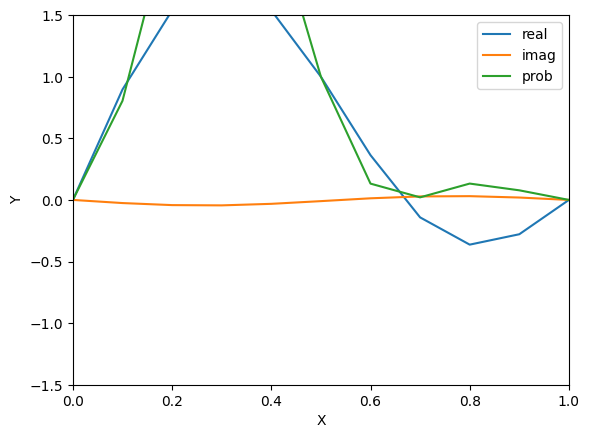

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

hbar = 1; m= 1; T = 1.5; L = 1;
dx = L/10 ; dt = dx**2*m/hbar/10;
x=np.arange(0, L+dx, dx)
t= np.arange(0, T+dt, dt)

V= np.zeros_like(x)
V[0] = V[-1] = float("inf")

def update(frame):
    global ydata
    ydata[1:-1] = ydata[1:-1]+dt/1j/hbar*(-hbar**2/2/m*(ydata[2:]-2*ydata[1:-1]+ydata[:-2])/dx**2+V[1:-1]*ydata[1:-1])
    line_real.set_ydata(ydata.real)  # y값을 업데이트
    line_imag.set_ydata(ydata.imag)
    line_prob.set_ydata(abs(ydata)**2)
    return line_real, line_prob, line_imag

# 초기 설정
fig, ax = plt.subplots()
ydata = np.sin(np.pi*x/L) + np.sin(np.pi*2*x/L)+ 0j
#norm = 1/np.sum(abs(ydata)**2)
#ydata = ydata*norm
line_real, = ax.plot(x, ydata.real, label = 'real')
line_imag, = ax.plot(x, ydata.imag, label = 'imag')
line_prob, = ax.plot(x, abs(ydata)**2, label = 'prob')
ax.set_ylim(-1.5, 1.5)  # y축 범위 설정
ax.set_xlim(0, L)  # x축 범위 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 애니메이션 설정
ani = FuncAnimation(fig, update, frames=t, blit=True, interval=20)

plt.legend()
plt.show()
HTML(ani.to_html5_video())

위의 코드는 1번 문제의 코드에서 변수 ydata의 초깃값을 $\sin\left(\dfrac{\pi x}{L}\right)+\sin\left(\dfrac{2\pi x}{L}\right)$로 바꾼 코드이다. 전반적인 코드 구성이나 원리, 초깃값은 1번 문제와 동일하다.